In [53]:
import re
import sys

import pandas as pd
import numpy as  np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [3]:
df_playstore= pd.read_csv('googleplaystore.csv')
df_playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
df_reviews= pd.read_csv('googleplaystore_user_reviews.csv')
df_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


# Playstore Data

In [5]:
df_playstore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
df_playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df_playstore.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [8]:
# Checking Data
def datacheck(data):
    print("-----------column----------")
    print(data.columns)
    print("----------info-----------")
    print(data.info())
    print("----------shape-----------")
    print(data.shape)
    print("----------duplicate-----------") 
    print(data.duplicated().sum())
    print("----------column types-----------") 
    print(data.dtypes)
    print("----------missing values sum-----------") 
    print(data.isnull().sum())
    print("----------end-----------") 

In [9]:
datacheck(df_playstore)

-----------column----------
Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android

Filling the missing values by median for numeric column and with mode for categorical column

In [10]:
for column in df_playstore.columns:
    median = df_playstore['Rating'].median()
    df_playstore[column].fillna(median, inplace=True)

In [11]:
for column in df_playstore.columns:
    mode = df_playstore['Type'].mode()
    df_playstore[column].fillna(mode, inplace=True)

In [12]:
for column in df_playstore.columns:
    mode = df_playstore['Content Rating'].mode()
    df_playstore[column].fillna(mode, inplace=True)

In [13]:
for column in df_playstore.columns:
    mode = df_playstore['Android Ver'].mode()
    df_playstore[column].fillna(mode, inplace=True)

In [14]:
# checking missing values again 
df_playstore.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# Reviews Data

In [12]:
df_reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [13]:
df_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [14]:
# Checking Data
def datacheck(data):
    print("-----------column----------")
    print(data.columns)
    print("----------info-----------")
    print(data.info())
    print("----------shape-----------")
    print(data.shape)
    print("----------duplicate-----------") 
    print(data.duplicated().sum())
    print("----------column types-----------") 
    print(data.dtypes)
    print("----------missing values sum-----------") 
    print(data.isnull().sum())
    print("----------end-----------")

In [15]:
datacheck(df_reviews)

-----------column----------
Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB
None
----------shape-----------
(64295, 5)
----------duplicate-----------
33616
----------column types-----------
App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype

Filling missing values with median for numeric column and with mode for categorical column

In [24]:
for column in df_reviews.columns:
    mode = df_reviews['Sentiment'].mode()
    df_reviews[column].fillna(mode, inplace=True)

In [25]:
for column in df_reviews.columns:
    mode = df_reviews['Translated_Review'].mode()
    df_reviews[column].fillna(mode, inplace=True)

In [26]:
for column in df_reviews.columns:
    median = df_reviews['Sentiment_Polarity'].median()
    df_reviews[column].fillna(median, inplace=True)

In [27]:
for column in df_reviews.columns:
    median = df_reviews['Sentiment_Subjectivity'].median()
    df_reviews[column].fillna(median, inplace=True)

In [28]:
# checking missing values
df_reviews.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

# Merging the playstore and review dataset

In [28]:
df_merge= pd.merge(df_playstore, df_reviews, on='App', how='outer')
df_merge

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134705,Home Street – Home Design Game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134706,Home Street – Home Design Game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134707,Home Street – Home Design Game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Good graphics, fun play",Positive,0.500,0.400000
134708,Home Street – Home Design Game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df_merge_1= df_merge.drop(['Last Updated','Current Ver','Android Ver','Translated_Review'], axis=1)

In [30]:
# Checking Data
def datacheck(data):
    print("-----------column----------")
    print(data.columns)
    print("----------info-----------")
    print(data.info())
    print("----------shape-----------")
    print(data.shape)
    print("----------duplicate-----------") 
    print(data.duplicated().sum())
    print("----------column types-----------") 
    print(data.dtypes)
    print("----------missing values sum-----------") 
    print(data.isnull().sum())
    print("----------end-----------") 

In [31]:
datacheck(df_merge_1)

-----------column----------
Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 134710 entries, 0 to 134709
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     134710 non-null  object 
 1   Category                131971 non-null  object 
 2   Rating                  131971 non-null  float64
 3   Reviews                 131971 non-null  object 
 4   Size                    131971 non-null  object 
 5   Installs                131971 non-null  object 
 6   Type                    131971 non-null  object 
 7   Price                   131971 non-null  object 
 8   Content Rating          131971 non-null  object 
 9   Genres                  13

In [32]:
df_merge_2= df_merge_1.drop_duplicates()

In [33]:
df_merge_2.duplicated().sum()


0

In [34]:
df_merge_2.shape

(46577, 13)

In [36]:
df_merge_2.isnull().sum()

App                           0
Category                   1155
Rating                     1155
Reviews                    1155
Size                       1155
Installs                   1155
Type                       1155
Price                      1155
Content Rating             1155
Genres                     1155
Sentiment                 10301
Sentiment_Polarity        10301
Sentiment_Subjectivity    10301
dtype: int64

In [79]:
corre=df_merge_2.corr()
corre

C:\Users\Madiha\AppData\Local\Temp\ipykernel_11884\3099288042.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corre=df_merge_2.corr()


,App,Rating,Sentiment_Polarity,Sentiment_Subjectivity
App,1.000000,-0.069785,0.018399,0.008572
Rating,-0.069785,1.000000,0.064817,0.022945
Sentiment_Polarity,0.018399,0.064817,1.000000,0.182677
Sentiment_Subjectivity,0.008572,0.022945,0.182677,1.000000


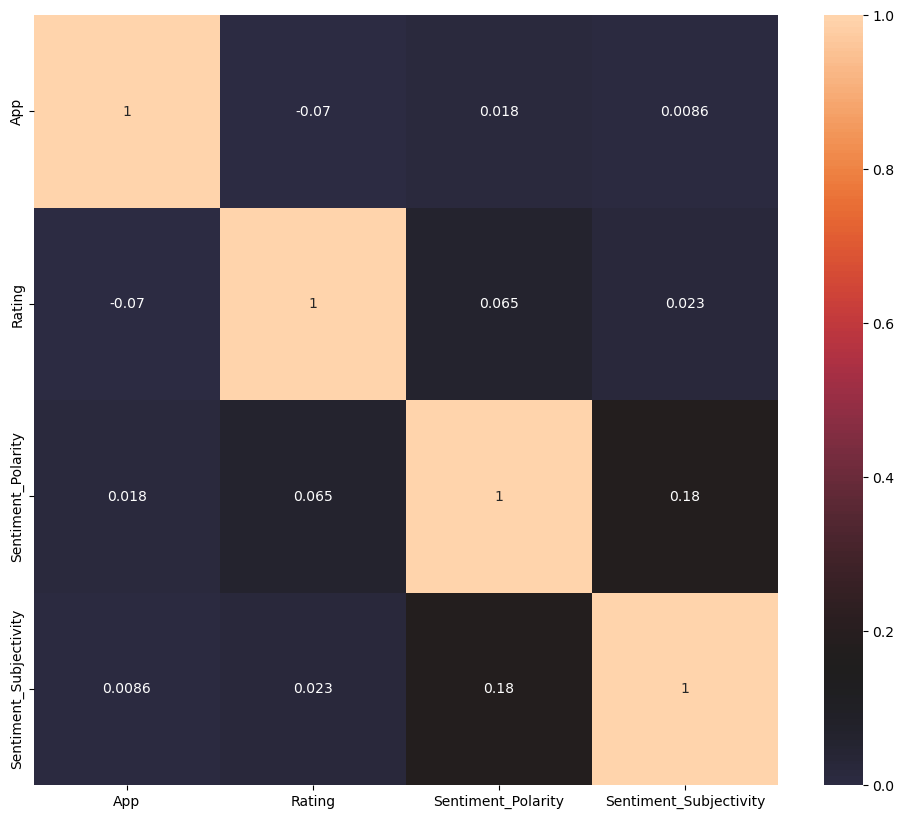

In [80]:
plt.figure(figsize=(12,10))
heatmapp=sns.heatmap(corre, annot=True, vmin=0, vmax=1, center=.15)

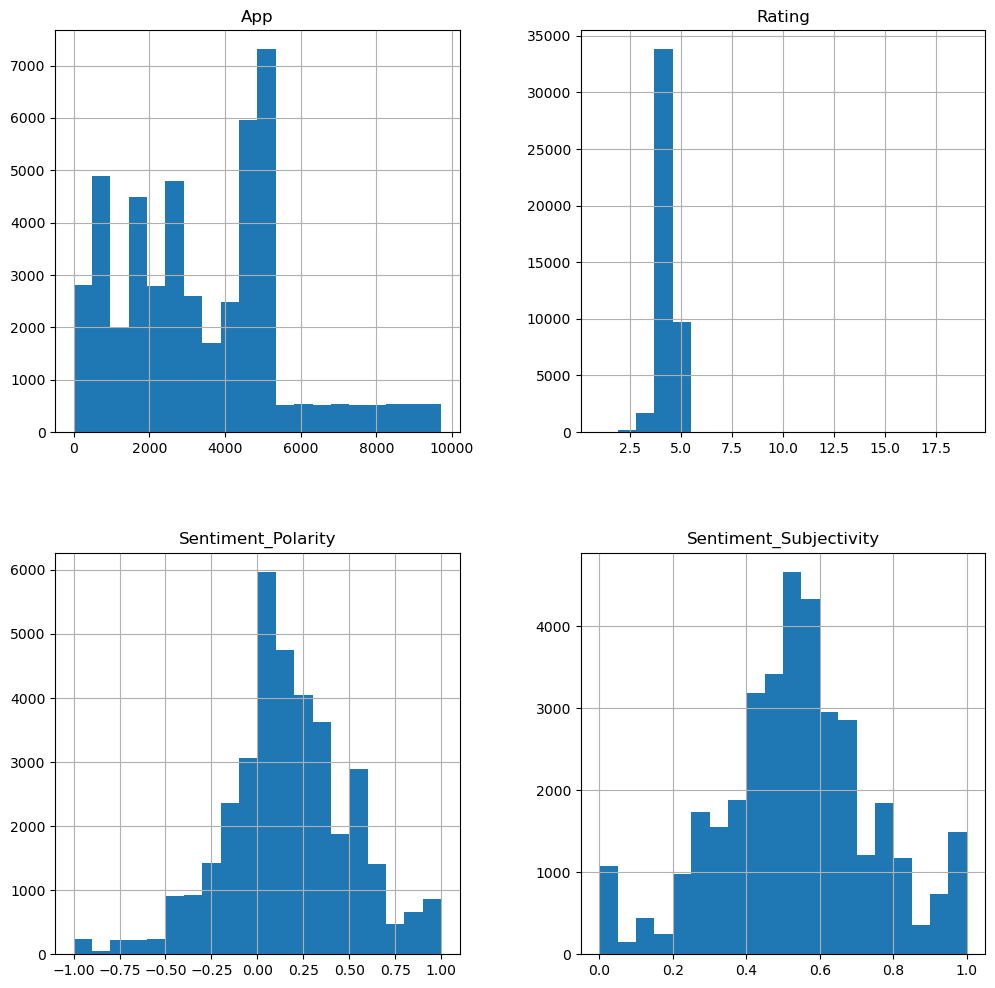

In [81]:
df_merge_2.hist(figsize=(12, 12), bins=20)
plt.show()

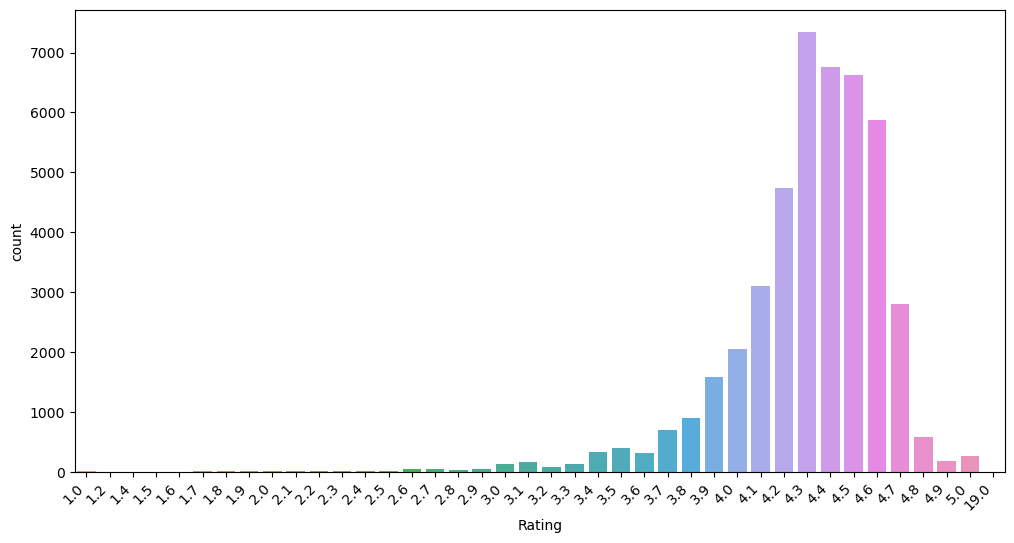

In [82]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Rating', data=df_merge_2)
plt.xticks(rotation=45, ha='right')
plt.show()

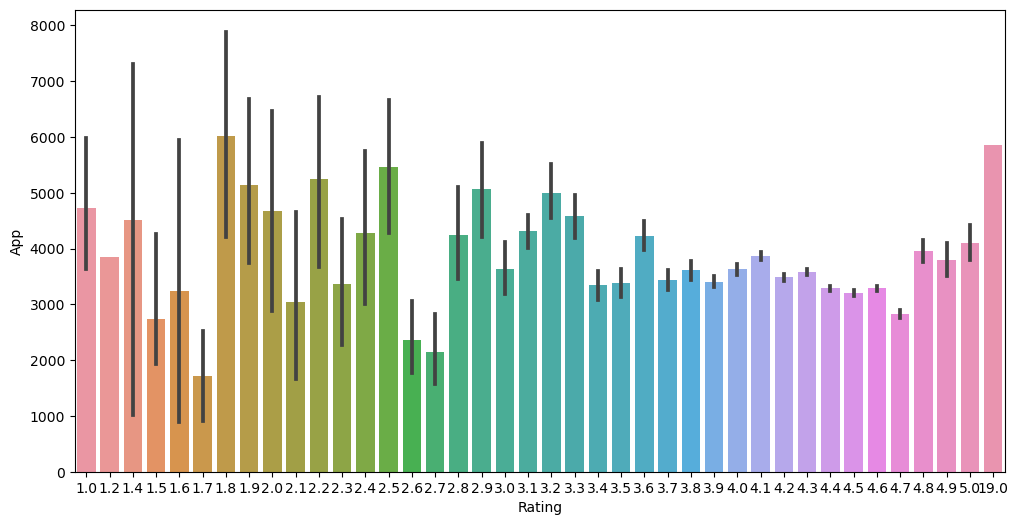

In [84]:
plt.figure(figsize=(12, 6))
sns.barplot(df_merge_2, x="Rating", y="App")
plt.show()

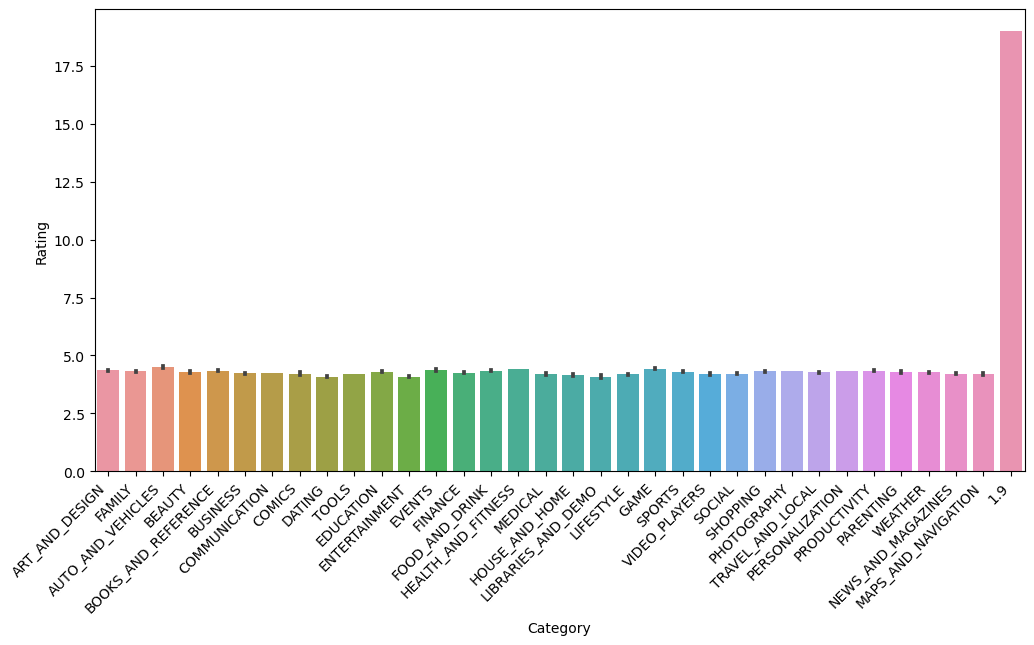

In [87]:
plt.figure(figsize=(12, 6))
sns.barplot(df_merge_2, x="Category", y="Rating")
plt.xticks(rotation=45, ha='right')
plt.show()

# Categorical Data Encoding

In [44]:
# Many machine learning algorithms can support categorical values without further manipulation but there are many more algorithms that do not. We need to make all data ready for the model, so we will convert categorical variables (variables that stored as text values) into numircal variables

In [48]:
# App values encoding
le = preprocessing.LabelEncoder()
df_merge_2['App'] = le.fit_transform(df_merge_2['App'])
# This encoder converts the values into numeric values

C:\Users\Madiha\AppData\Local\Temp\ipykernel_11884\1228818846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_2['App'] = le.fit_transform(df_merge_2['App'])


In [71]:
# Category features encoding
category_list = df_merge_2['Category'].unique().tolist()
category_list = ['cat_' + word for word in category_list]
df_merge_2 = pd.concat([df_merge_2, pd.get_dummies(df_merge_2['Category'], prefix='cat')], axis=1)

TypeError: can only concatenate str (not "float") to str

converting categorical column to numeric

In [68]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical column
df_merge_1['Size'] = label_encoder.fit_transform(df_merge_1['Size'])

df_merge_1['Price'] = label_encoder.fit_transform(df_merge_1['Price'])

df_merge_1['Installs'] = label_encoder.fit_transform(df_merge_1['Installs'])

df_merge_1['Reviews'] = label_encoder.fit_transform(df_merge_1['Reviews'])

# Evaluation Procedure

In [42]:
# Split data into training and testing sets
features = ['App', 'Reviews', 'Size', 'Installs', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver']
features.extend('App')
X = df_merge_2['Category']
y = df_merge_2['Rating']

In [43]:
X.head()

0    ART_AND_DESIGN
1    ART_AND_DESIGN
2    ART_AND_DESIGN
3    ART_AND_DESIGN
4    ART_AND_DESIGN
Name: Category, dtype: object

In [93]:
for column in df_merge_1.columns:
    mode = df_merge_1['Category'].mode()
    df_merge_1[column].fillna(mode, inplace=True)

C:\Users\Madiha\AppData\Local\Temp\ipykernel_2828\789761371.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_1[column].fillna(mode, inplace=True)
C:\Users\Madiha\AppData\Local\Temp\ipykernel_2828\789761371.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_1[column].fillna(mode, inplace=True)
C:\Users\Madiha\AppData\Local\Temp\ipykernel_2828\789761371.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_1[

# Split Data into train and Test

In [60]:
# Features and Labels Segregation
X = df_merge_1.drop(['App', 'Rating'], axis=1)
y = df_merge_1['Rating']

# Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((107768, 11), (26942, 11), (107768,), (26942,))

# Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predicting the ratings on the test set
y_pred = linear_reg.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

(mae, mse, rmse)

ValueError: could not convert string to float: 'SPORTS'

converting categorical column to numeric

In [86]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical column
df_merge_1['Size'] = label_encoder.fit_transform(df_merge_1['Size'])

df_merge_1['Price'] = label_encoder.fit_transform(df_merge_1['Price'])

df_merge_1['Installs'] = label_encoder.fit_transform(df_merge_1['Installs'])

df_merge_1['Reviews'] = label_encoder.fit_transform(df_merge_1['Reviews'])

C:\Users\Madiha\AppData\Local\Temp\ipykernel_2828\3144513118.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_1['Size'] = label_encoder.fit_transform(df_merge_1['Size'])
C:\Users\Madiha\AppData\Local\Temp\ipykernel_2828\3144513118.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_1['Price'] = label_encoder.fit_transform(df_merge_1['Price'])
C:\Users\Madiha\AppData\Local\Temp\ipykernel_2828\3144513118.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 